# 🚀 Complete Feature Engineering Workbook
Generated on 2025-04-18 04:36

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, mutual_info_classif, f_classif, VarianceThreshold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
np.random.seed(42)

## 1️⃣ Creating a Synthetic Dataset

In [2]:
df = pd.DataFrame({
    'Age': np.random.randint(18, 70, 100),
    'Income': np.random.normal(50000, 15000, 100).astype(int),
    'Gender': np.random.choice(['Male', 'Female'], 100),
    'Department': np.random.choice(['ICU', 'Surgery', 'Ortho'], 100),
    'Purchased': np.random.choice([0, 1], 100),
    'Text': np.random.choice(['great product', 'bad service', 'excellent', 'not good'], 100)
})
df.head()

,Age,Income,Gender,Department,Purchased,Text
0,56,21864,Female,ICU,0,great product
1,69,29498,Male,ICU,0,not good
2,46,59544,Male,ICU,1,not good
3,32,36399,Female,Ortho,1,not good
4,60,57140,Female,Ortho,1,not good


## 2️⃣ Handling Missing Values

In [3]:
df.loc[::10, 'Age'] = np.nan
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Income'] = df['Income'].fillna(df['Income'].mean())
df.head(10)

,Age,Income,Gender,Department,Purchased,Text
0,42.0,21864,Female,ICU,0,great product
1,69.0,29498,Male,ICU,0,not good
2,46.0,59544,Male,ICU,1,not good
3,32.0,36399,Female,Ortho,1,not good
4,60.0,57140,Female,Ortho,1,not good
5,25.0,69554,Female,ICU,0,excellent
6,38.0,53173,Female,ICU,1,bad service
7,56.0,58955,Male,Surgery,1,great product
8,36.0,36554,Female,ICU,1,not good
9,40.0,48320,Female,Surgery,1,not good


## 3️⃣ Label and One-Hot Encoding

In [4]:
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
df = pd.concat([df, pd.get_dummies(df['Department'], drop_first=True)], axis=1)
df.head()

,Age,Income,Gender,Department,Purchased,Text,Ortho,Surgery
0,42.0,21864,0,ICU,0,great product,False,False
1,69.0,29498,1,ICU,0,not good,False,False
2,46.0,59544,1,ICU,1,not good,False,False
3,32.0,36399,0,Ortho,1,not good,True,False
4,60.0,57140,0,Ortho,1,not good,True,False


## 4️⃣ Feature Scaling

In [5]:
scaler = StandardScaler()
df['Income_scaled'] = scaler.fit_transform(df[['Income']])
df[['Income', 'Income_scaled']].head()

,Income,Income_scaled
0,21864,-1.889793
1,29498,-1.387466
2,59544,0.589598
3,36399,-0.933372
4,57140,0.431412


## 5️⃣ Text Vectorization - Bag of Words

In [6]:
vectorizer = CountVectorizer()
X_bow = vectorizer.fit_transform(df['Text'])
pd.DataFrame(X_bow.toarray(), columns=vectorizer.get_feature_names_out()).head()

,bad,excellent,good,great,not,product,service
0,0,0,0,1,0,1,0
1,0,0,1,0,1,0,0
2,0,0,1,0,1,0,0
3,0,0,1,0,1,0,0
4,0,0,1,0,1,0,0


## 6️⃣ Text Vectorization - TF-IDF

In [7]:
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(df['Text'])
pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out()).head()

,bad,excellent,good,great,not,product,service
0,0.0,0.0,0.000000,0.707107,0.000000,0.707107,0.0
1,0.0,0.0,0.707107,0.000000,0.707107,0.000000,0.0
2,0.0,0.0,0.707107,0.000000,0.707107,0.000000,0.0
3,0.0,0.0,0.707107,0.000000,0.707107,0.000000,0.0
4,0.0,0.0,0.707107,0.000000,0.707107,0.000000,0.0


## 7️⃣ Polynomial Feature Generation

In [8]:
df['Age_squared'] = df['Age'] ** 2
df[['Age', 'Age_squared']].head()

,Age,Age_squared
0,42.0,1764.0
1,69.0,4761.0
2,46.0,2116.0
3,32.0,1024.0
4,60.0,3600.0


## 8️⃣ Feature Binning

In [9]:
df['Income_bin'] = pd.cut(df['Income'], bins=3, labels=['Low', 'Medium', 'High'])
df[['Income', 'Income_bin']].head()

,Income,Income_bin
0,21864,Low
1,29498,Low
2,59544,Medium
3,36399,Low
4,57140,Medium


## 9️⃣ PCA for Dimensionality Reduction

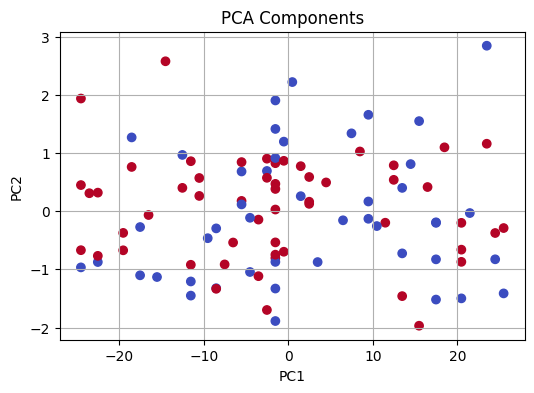

In [10]:
X = df[['Age', 'Income_scaled']].dropna()
pca = PCA(n_components=2)
pca_data = pca.fit_transform(X)
df['PC1'], df['PC2'] = pca_data[:, 0], pca_data[:, 1]

plt.figure(figsize=(6,4))
plt.scatter(df['PC1'], df['PC2'], c=df['Purchased'], cmap='coolwarm')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Components")
plt.grid(True)
plt.show()

## 🔟 Feature Interaction Terms

In [11]:
df['Age_Income_Interaction'] = df['Age'] * df['Income_scaled']
df[['Age', 'Income_scaled', 'Age_Income_Interaction']].head()

,Age,Income_scaled,Age_Income_Interaction
0,42.0,-1.889793,-79.371314
1,69.0,-1.387466,-95.735178
2,46.0,0.589598,27.121526
3,32.0,-0.933372,-29.867899
4,60.0,0.431412,25.884730


## 1️⃣1️⃣ Variance Threshold Feature Selection

In [12]:
vt = VarianceThreshold(threshold=0.01)
selected = vt.fit_transform(df[['Age', 'Income_scaled', 'Gender']])
print("Remaining columns:", vt.get_feature_names_out(['Age', 'Income_scaled', 'Gender']))

Remaining columns: ['Age' 'Income_scaled' 'Gender']


## 1️⃣2️⃣ Correlation Heatmap

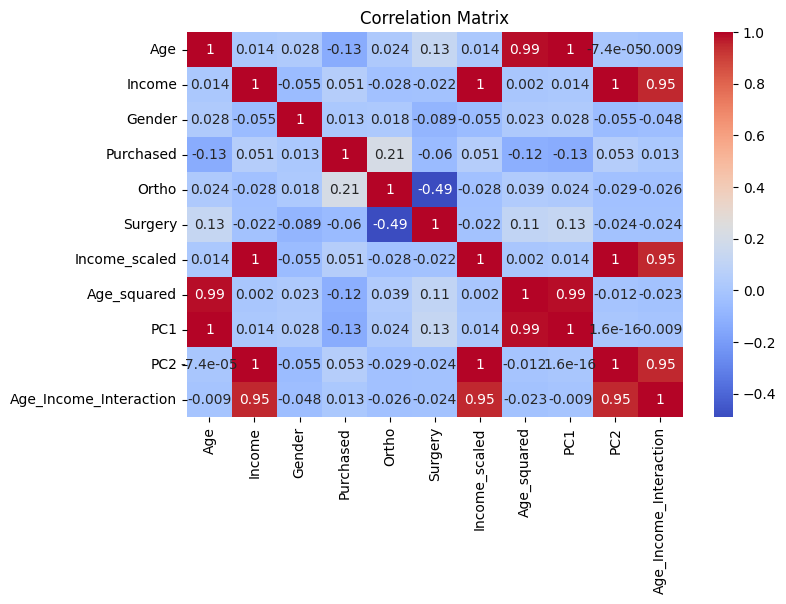

In [13]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(8, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

## 1️⃣3️⃣ Mutual Information

In [14]:
X = df[['Age', 'Income_scaled', 'Gender']]
y = df['Purchased']
mi = mutual_info_classif(X, y)
for feature, score in zip(X.columns, mi):
    print(f"{feature}: {score:.4f}")

Age: 0.0000
Income_scaled: 0.0000
Gender: 0.0783


## 1️⃣4️⃣ ANOVA F-Score

In [15]:
f_scores = f_classif(X, y)[0]
for feature, score in zip(X.columns, f_scores):
    print(f"{feature}: {score:.4f}")

Age: 1.7293
Income_scaled: 0.2529
Gender: 0.0166


## 1️⃣5️⃣ Random Forest Feature Importance

In [16]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)
for feature, score in zip(X.columns, model.feature_importances_):
    print(f"{feature}: {score:.4f}")

Age: 0.4198
Income_scaled: 0.5527
Gender: 0.0275
